In [86]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [87]:
from scripts.dataloader import DataLoader

In [88]:
dataloader = DataLoader()
df = dataloader.read_data('../data', 'AdSmartABdata.csv')

In [89]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


### Percent and Count of missing values

In [90]:
from scripts.utils import Utils
util = Utils()
count, percent = util.get_missing_info(df)
count

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

The data don't have missing value

### Get unique values

In [91]:
print(len(df))
unique_value = util.get_unique_values(df)
len(unique_value)

8077


8077

There is no repeted user

In [92]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [93]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [94]:
control_users = df[df['experiment'] == 'control']
exposed_users = df[df['experiment'] == 'exposed']
print("{} number of elements are from control group, and {} elements are exposed group".format(len(control_users), len(exposed_users)))

4071 number of elements are from control group, and 4006 elements are exposed group


In [95]:
from scripts.visualization import Visualization
plot = Visualization()

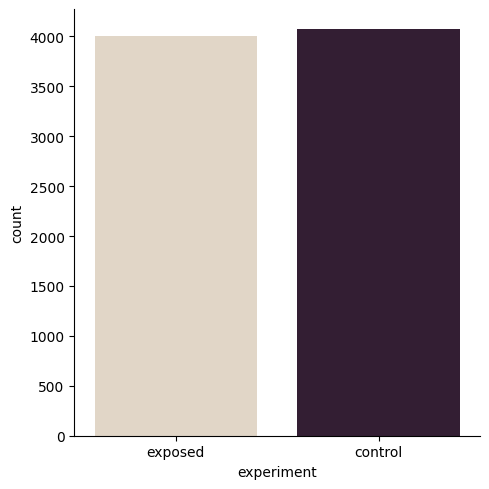

In [96]:
plot.catplot('experiment', df)

In [97]:
control_users.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [98]:
exposed_users.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


### The number of yes and no in each group

In [99]:
exposed_yes = exposed_users['yes'].sum()
print("From {} exposed users {} reacted to yes".format(len(exposed_users), exposed_yes))
exposed_no = exposed_users['no'].sum()
print("From {} exposed users {} reacted to no".format(len(exposed_users), exposed_no))

From 4006 exposed users 308 reacted to yes
From 4006 exposed users 349 reacted to no


In [100]:
control_yes = control_users['yes'].sum()
print("From {} controlled users {} reacted to yes".format(len(control_users), control_yes))
control_no = exposed_users['no'].sum()
print("From {} controlled users {} reacted to no".format(len(control_users), control_no))

From 4071 controlled users 264 reacted to yes
From 4071 controlled users 349 reacted to no


### The Distribution of Yes and No in the controlled Users

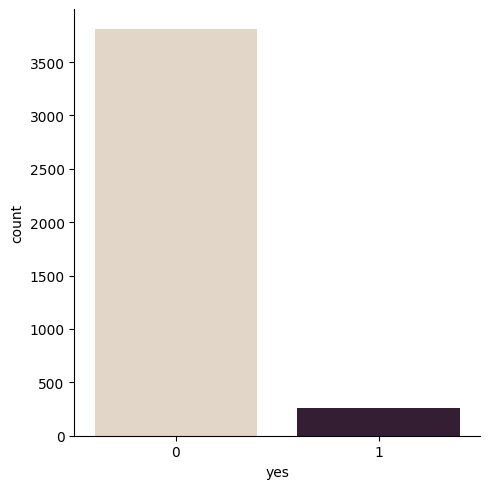

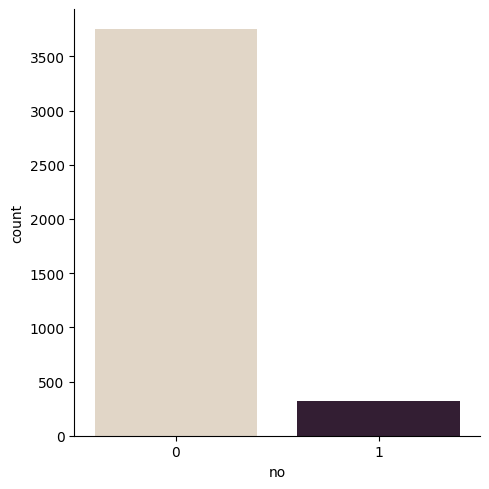

In [101]:
plot.catplot("yes", control_users)
plot.catplot("no", control_users)

264 out of 4071 controlled users are reacted to yes. Most of the users didn't react. They are nutral. 

### The Distribution of Yes and No in the exposed Users

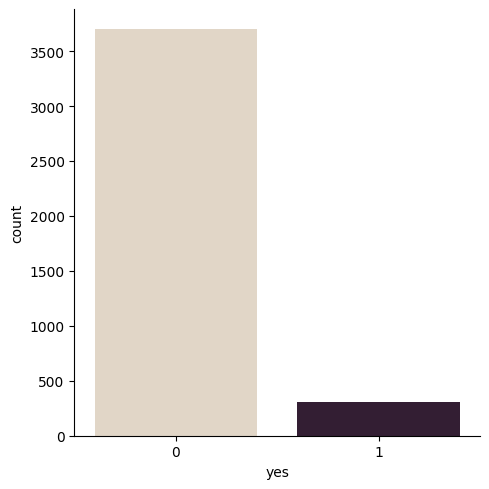

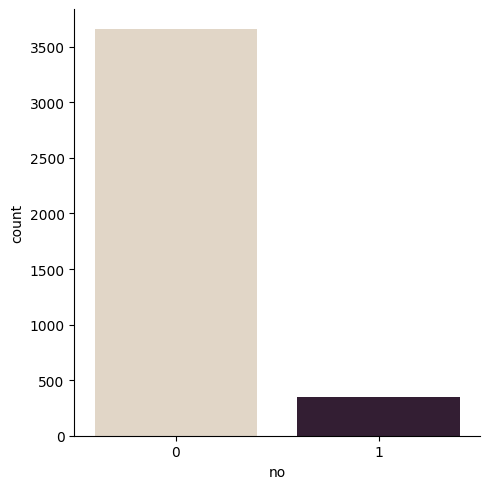

In [102]:
plot.catplot("yes", exposed_users)
plot.catplot("no", exposed_users)

From the exposed users 308 reacted to yes and 349 reacted to no. Most of the users didn't react. They are nutral. 

In [103]:
browsers = df["browser"].value_counts()
platforms = df["platform_os"].value_counts()
devices = df["device_make"].value_counts()

In [104]:
browsers

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [105]:
platforms

6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [106]:
devices

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

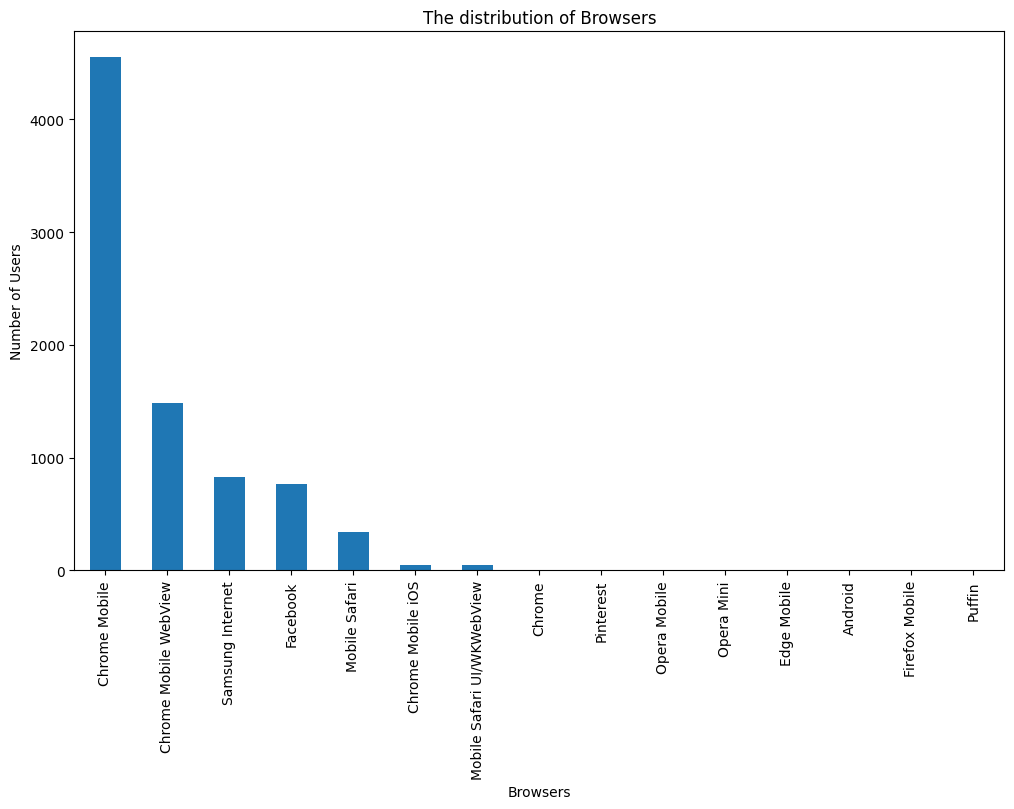

In [107]:
plot.barplot(browsers, "The distribution of Browsers", "Browsers", "Number of Users")

Most of the users use Chrome Mobile as their browser.

In [ ]:
plot.barplot(platforms, "The distribution of Platforms", "Platforms", "Number of Users")

In [118]:
yes_no_dist_browser = df.groupby(["browser", "experiment"]).agg({'yes':'sum', 'no':'sum'})

<Figure size 1200x700 with 0 Axes>

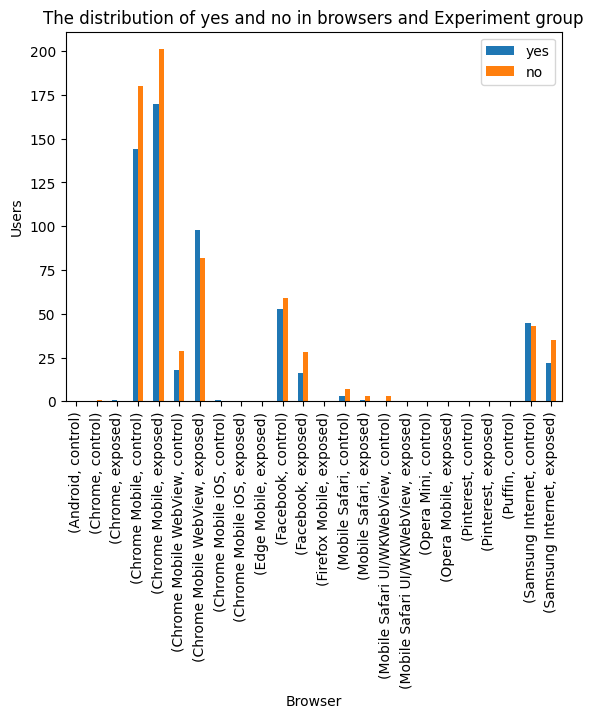

In [121]:
plot.barplot(yes_no_dist_browser, "The distribution of yes and no in browsers and Experiment group", "Browser", "Users")

The above plot shows the reaction of the users in a specific browser and 

In [111]:
yes_no_dist_date = df.groupby(["date","experiment"]).agg({'yes':'sum', 'no':'sum'})

In [112]:
yes_no_dist_date

yes   no
date       experiment          
2020-07-03 control     104  129
           exposed      43   49
2020-07-04 control      30   38
           exposed      46   45
2020-07-05 control      17   26
           exposed      35   39
2020-07-06 control      12   14
           exposed      23   25
2020-07-07 control      16   21
           exposed      22   24
2020-07-08 control      27   31
           exposed      58   61
2020-07-09 control      30   35
           exposed      55   64
2020-07-10 control      28   28
           exposed      26   42

<Figure size 1200x700 with 0 Axes>

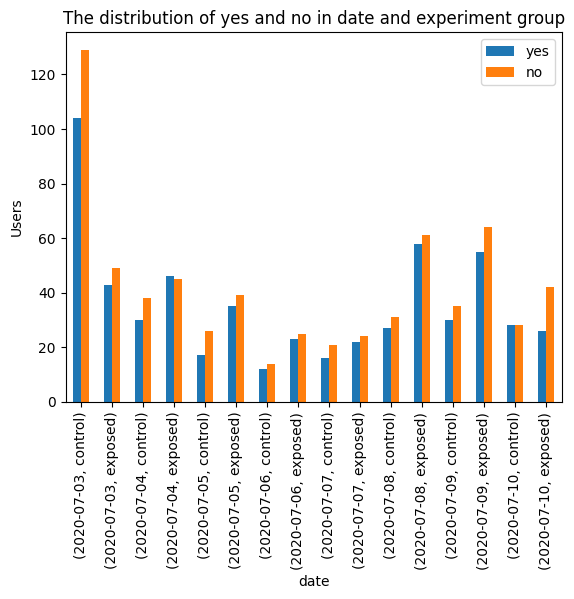

In [115]:
plot.barplot(yes_no_dist_date, "The distribution of yes and no in date and experiment group", "date", "Users")